# **Proyecto 12**

## **Librerias**

In [ ]:
!pip install wbgapi
!pip install umap-learn

In [23]:
import wbgapi as wb

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

## **Construcción de los datos**

In [4]:
variables = ['espectativa_vida','emisiones_co2','gasto_nacional','tasa_interes_real', 'gastos','crec_pib_percapita','ahorro_bruto','rentas_petroleras','ingresos_fiscales','pib_percapita']

codigos = ['SP.DYN.LE00.IN','EN.ATM.CO2E.KD.GD','NE.DAB.TOTL.ZS','FR.INR.RINR', 'GC.XPN.TOTL.GD.ZS','NY.GDP.PCAP.KD.ZG', 'SH.XPD.GHED.GD.ZS','NY.GDP.PETR.RT.ZS','GC.TAX.TOTL.GD.ZS','NY.GDP.PCAP.CD']

dic = {codigo:variable for (codigo,variable) in zip(codigos,variables)}


In [5]:
datos = wb.data.DataFrame(codigos[0], time=[2019], labels=True,)
datos = datos['Country'] 
for var,name in zip(codigos,variables):
  df = wb.data.DataFrame(var, time=[2019], labels=True,)
  df = df.reset_index(drop=True)
  datos = pd.merge(datos,df,how='outer',on='Country')

datos = datos.dropna().rename(columns=dic)
datos['pib_categoria'] = pd.cut(datos['pib_percapita'],bins=datos['pib_percapita'].quantile([0,0.50,0.75,1]).values,labels=[0,1,2])
datos['pib_categoria'] = datos['pib_categoria'].fillna(0)

In [6]:
datos.head()

,Country,espectativa_vida,emisiones_co2,gasto_nacional,tasa_interes_real,gastos,crec_pib_percapita,ahorro_bruto,rentas_petroleras,ingresos_fiscales,pib_percapita,pib_categoria
1,Zambia,63.886000,0.282276,99.195128,2.469674,21.956163,-1.451364,2.129205,0.000000,16.677623,1305.001031,0
7,Vanuatu,70.474000,0.243004,100.589111,-1.238740,27.840881,0.760014,1.917071,0.000000,17.594661,3122.982599,0
8,Uzbekistan,71.725000,1.099363,117.563625,4.830857,16.844496,3.744518,2.336167,1.405727,12.695375,1784.009816,0
9,Uruguay,77.911000,0.116909,94.106663,2.795923,32.586468,-0.010199,6.225708,0.000000,18.154268,17688.015008,2
10,United States,78.787805,0.241787,102.789901,3.432389,22.741536,1.824124,8.524923,0.362576,10.030563,65094.799429,2


## **PCA y UMAP**

### **PCA**

In [7]:
X = datos.drop(columns=['Country']).to_numpy()
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scal)
# pca_2 = pd.DataFrame(X_pca, columns=['PC1','PC2'])

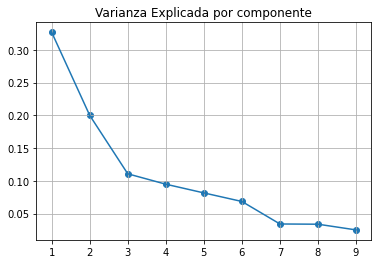

In [8]:
plt.title('Varianza Explicada por componente')
plt.plot(range(1,10),pca.explained_variance_ratio_,)
plt.scatter(range(1,10),pca.explained_variance_ratio_)
plt.grid()
plt.show()

In [9]:
pca = PCA(n_components=2,random_state=7)
X_pca = pca.fit_transform(X_scal)
pca2 = pd.DataFrame(X_pca,columns=['pc1','pc2'])

#### **Visualizacion PCA 2 Componentes**

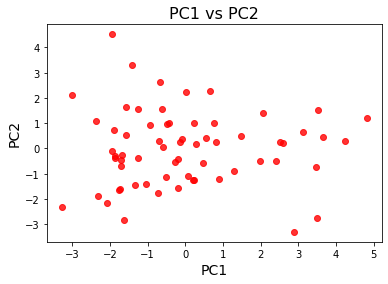

In [20]:
plt.scatter(pca2['pc1'],pca2['pc2'],color='red',alpha=0.8)
plt.title('PC1 vs PC2',fontsize=16)
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2',fontsize=14)
plt.savefig('pca_2componentes.jpg')
plt.show()

#### **Visualizacion PCA 3 Componentes**

In [11]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scal)
pca3 = pd.DataFrame(X_pca,columns=['pc1','pc2','pc3'])

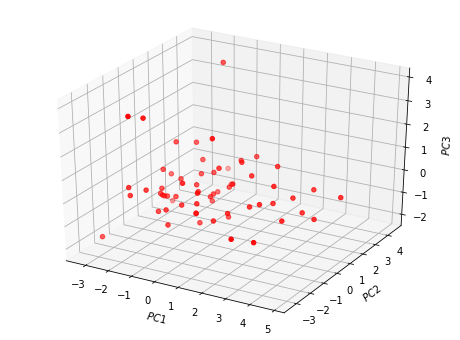

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

xs = pca3['pc1']
ys = pca3['pc2']
zs = pca3['pc3']

ax.scatter(xs, ys, zs,color='red')
ax.set_xlabel(r'$PC1$')
ax.set_ylabel(r'$PC2$')
ax.set_zlabel(r'$PC3$')
plt.savefig('pca_3componentes.jpg')
plt.show()

### **UMAP**

In [13]:
reducer = umap.UMAP(n_components=3,random_state=7)
X_trans = reducer.fit_transform(X_scal)

In [14]:
umap_ = pd.DataFrame(X_trans,columns=['pc1','pc2','pc3'])

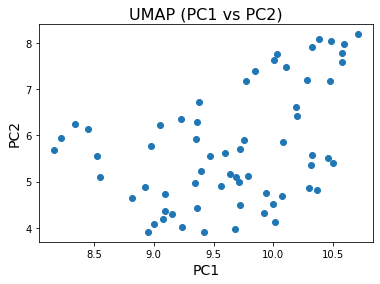

In [15]:
plt.scatter(umap_['pc1'],umap_['pc2'])
plt.title('UMAP (PC1 vs PC2)',fontsize=16)
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2',fontsize=14)
plt.show()

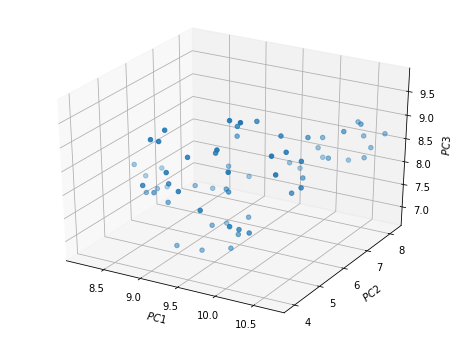

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

xs = umap_['pc1']
ys = umap_['pc2']
zs = umap_['pc3']
ax.scatter(xs, ys, zs)
ax.set_xlabel(r'$PC1$')
ax.set_ylabel(r'$PC2$')
ax.set_zlabel(r'$PC3$')
plt.show()

## **Clustering Kmeans**

In [25]:
indices_davies = []
for i in range(2,9):
  kmeans = KMeans(n_clusters=i, random_state=777,algorithm='elkan').fit(X_scal)
  labels = kmeans.labels_
  indices_davies.append(davies_bouldin_score(X_scal, labels))

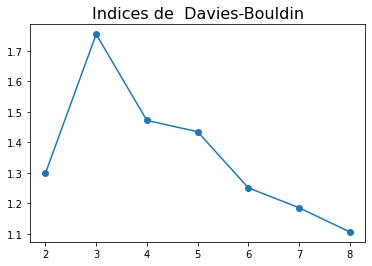

In [48]:
plt.title('Indices de  Davies-Bouldin',fontsize=16)
plt.plot(range(2,9),indices_davies)
plt.scatter(range(2,9),indices_davies)
plt.xticks(range(2,9))
plt.savefig('Indice.jpg')
plt.show()


In [45]:
kmeans = KMeans(n_clusters=2, random_state=777,algorithm='elkan').fit(X_scal)
pca2['labels'] = kmeans.labels_

In [40]:
pca2;

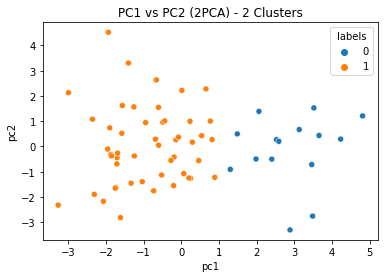

In [50]:
plt.title('PC1 vs PC2 (2PCA) - 2 Clusters')
sns.scatterplot(data=pca2,x='pc1',y='pc2',hue='labels')
plt.savefig('2cluster_pca.jpg')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=8, random_state=777,algorithm='elkan').fit(X_scal)
pca2['labels'] = kmeans.labels_


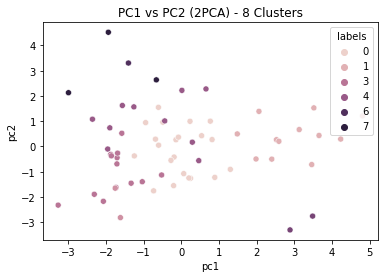

In [53]:
plt.title('PC1 vs PC2 (2PCA) - 8 Clusters')
sns.scatterplot(data=pca2,x='pc1',y='pc2',hue='labels')
plt.savefig('8cluster_pca.jpg')
plt.show()